Importing the libraries

In [32]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Split the data.
from sklearn.model_selection import train_test_split

# Utils
from src.eda_utils import *
from src.snake import camel_to_snake

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['figure.dpi']          = 50
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

# Understanding the data

- The dataset was collected from kaggle: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction
- It contains bank customers data, with demographic, financial and product information. It is already labeled, with churners identified as 1 and non-churners identified as 0 in the attrition flag variable.
- I will initially drop two variables because I don't need them, and it doesn't seem to make a difference of a machine learning model.

In [33]:
# data_path = 'C:\Projetos\Churn-Prediction-Bank\input\BankChurners.csv' # TODO - Make the path better
data_path = '..\input\BankChurners.csv' # New path, perfect!!
df = pd.read_csv(data_path)

# Features that must be dropped.
df.drop(columns=['RowNumber', 'Surname'], inplace=True)

In [4]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


### Data dictionary

<b>1. CustomerId:</b> Client number. Unique identifier for the customer holding the account. Categorical nominal.<br>
<b>2. CreditScore:</b> Credit score of the customer. Ranges from 0 to 850. Numerical continouos.<br>
<b>3. Geography:</b> Country where the customer resides (e.g., France, Spain, Germany). Categorical nominal.<br>
<b>4. Gender:</b> Demographic variable - Male / Female. Categorical nominal.<br>
<b>5. Age:</b> Demographic variable - Customer`s Age in Years. Numerical discrete.<br>
<b>6. Tenure:</b> Number of years the customer has been with the bank. Numerical discrete.<br>
<b>7. Balance:</b> Account balance of the customer. Numerical continuous.<br>
<b>8. NumOfProducts:</b> Number of bank products the customer is using. Numerical discrete.<br>
<b>9. HasCrCard:</b> Indicates whether the customer has a credit card (1 = Yes, 0 = No). Categorical ordinal.<br>
<b>10. IsActiveMember:</b> Indicates whether the customer is an active member (1 = Yes, 0 = No). Categorical ordinal.<br>
<b>11. EstimatedSalary:</b> Estimated annual salary of the customer. Numerical continuous.<br>
<b>12. Exited:</b> Indicates whether the customer has exited (closed the account). Target variable. Binary (1 = Yes, 0 = No).<br>



Looking at dataset general information.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10002 non-null  int64  
 1   CreditScore      10002 non-null  int64  
 2   Geography        10001 non-null  object 
 3   Gender           10002 non-null  object 
 4   Age              10001 non-null  float64
 5   Tenure           10002 non-null  int64  
 6   Balance          10002 non-null  float64
 7   NumOfProducts    10002 non-null  int64  
 8   HasCrCard        10001 non-null  float64
 9   IsActiveMember   10001 non-null  float64
 10  EstimatedSalary  10002 non-null  float64
 11  Exited           10002 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 937.8+ KB


In [5]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 10002 rows and 12 columns


Looking at some descriptive statistics.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10002.0,1.569093e+07,71931.769345,15565701.00,15628524.75,15690732.00,1.575323e+07,15815690.00
CreditScore,10002.0,6.505551e+02,96.661615,350.00,584.00,652.00,7.180000e+02,850.00
Age,10001.0,3.892231e+01,10.487200,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,10002.0,5.012498e+00,2.891973,0.00,3.00,5.00,7.000000e+00,10.00
Balance,10002.0,7.649111e+04,62393.474144,0.00,0.00,97198.54,1.276478e+05,250898.09
NumOfProducts,10002.0,1.530194e+00,0.581639,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,10001.0,7.055294e-01,0.455827,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,10001.0,5.149485e-01,0.499801,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,10002.0,1.000833e+05,57508.117802,11.58,50983.75,100185.24,1.493837e+05,199992.48
Exited,10002.0,2.037592e-01,0.402812,0.00,0.00,0.00,0.000000e+00,1.00


In [6]:
df['Exited'].value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

Some insights:

TODO

Looking at missing and duplicated values.

In [7]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(2)

There are four missing values and two duplicated values.

Cleaning missing and duplicated values.

In [ ]:
df = df.dropna().drop_duplicates()

Looking at missing and duplicates values.

In [49]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

There are no missing or duplicated values.

- I will drop the CustomerId variable becouse it has an unique value for each record, not being useful for the analysis.
- I will rename the columns in a standard format in order to turn the data manipulation easier. Moreover, Exited will be renamed as churn_flag for interpretation purposes.
- I will express Gender variable as binary. This will make EDA easier, like when looking at percentual values.

In [34]:
df.drop(columns=['CustomerId'], inplace=True)

In [ ]:
df.columns = [x.lower() for x in df.columns]

In [ ]:
df.columns = [camel_to_snake(col) for col in df.columns]

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [37]:
df.rename(columns={'Exited': 'churn_flag'}, inplace=True)

# Split the data into train test sets

- First of all, I will split the data into train test sets.
- Test set is supposed to be the data model has never seen before.
- I will perform EDA focusing on the training set in order to avoid data leakage, get a realistic representation and evaluete the model correctly with new unseen data.
- I will specify stratify=y that the train_test_split function ensures that the splitting process maintains the same percentage of each target class in both the training and  testing sets. This particularly useful when dealing with imbalanced datasets, which is the casa, as there are more existing customers thaan attrited ones.

In [8]:
X = df.drop(columns=['churn_flag'])
y = df['churn_flag'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [9]:
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (8001, 11).
Train target dataset shape: (8001,).
Test predictor dataset shape: (2001, 11).
Test target dataset shape: (2001,).


In [13]:
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
churn_flag
0    0.796275
1    0.203725
Name: proportion, dtype: float64

Test target proportion: 
churn_flag
0    0.796102
1    0.203898
Name: proportion, dtype: float64


# Exploratory data analysis

In [14]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn_flag
5737,15575428,682,Germany,Female,35.0,2,117438.92,2,1.0,1.0,16910.98,0
2956,15642885,792,France,Male,30.0,8,0.00,2,1.0,0.0,199644.20,0
5455,15726855,805,Germany,Female,45.0,9,116585.97,1,1.0,0.0,189428.75,1
1210,15658969,711,France,Male,51.0,7,0.00,3,1.0,0.0,38409.79,1
2863,15659175,755,France,Female,43.0,9,0.00,2,1.0,0.0,18066.69,0


I wil create separate lists for categorical, numerical, and target features in order to analyze the data separately.

In [15]:
numerical_features = X_train.select_dtypes('number').columns.tolist()
categorical_features = X_train.select_dtypes('object').columns.tolist()
target = 'churn_flag'

print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}')

There are 9 numerical features. They are: 
['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

There are 2 categorical features. They are: 
['Geography', 'Gender']

The target feature is: churn_flag


In [16]:
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {train[feature].nunique()} unique values. They are: ')
    print(train[feature].value_counts(normalize=True))
    print()

Geography
----------------------------------------
There are 3 unique values. They are: 
Geography
France     0.500312
Germany    0.250844
Spain      0.248844
Name: proportion, dtype: float64

Gender
----------------------------------------
There are 2 unique values. They are: 
Gender
Male      0.546182
Female    0.453818
Name: proportion, dtype: float64



- geography and gender present nominal relationship. Thus, OneHotEncoder might be a good choice for encoding them.

### Univariate analysis

I will do univariate analysis below in order to see which are the typical values of each feature for the bank's customers.

### Target distribution

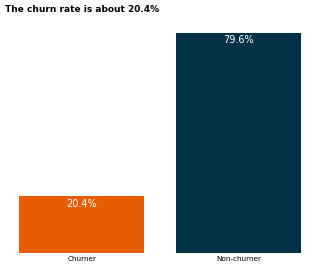

In [23]:
# Group the data by churn_flag.
churn_grp = train.groupby(['churn_flag'])[['churn_flag']].count().rename(columns={'churn_flag': 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

# Define the plot.
fig, ax = plt.subplots(figsize=(8, 6))

# Plor the barplot.
bars = ax.bar(x=churn_grp['churn_flag'], height=churn_grp['pct'], color=['#e85d04', '#023047'])

# Customize the plot/
ax.set_title('The churn rate is about 20.4%', fontweight='bold', fontsize=13, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Non-churner', 'Churner'], fontsize=10.5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.invert_xaxis()
        
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height), 
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),  
                textcoords="offset points",
                ha='center', va='center',
                fontsize=14, color='white')